In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


## Load dataset

In [40]:
data_set = pd.read_csv('Crop_recommendation.csv')
print(data_set.shape)
f_title = data_set.columns

(2200, 8)


In [41]:
data_set.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


## Visualize Correlation Between Features

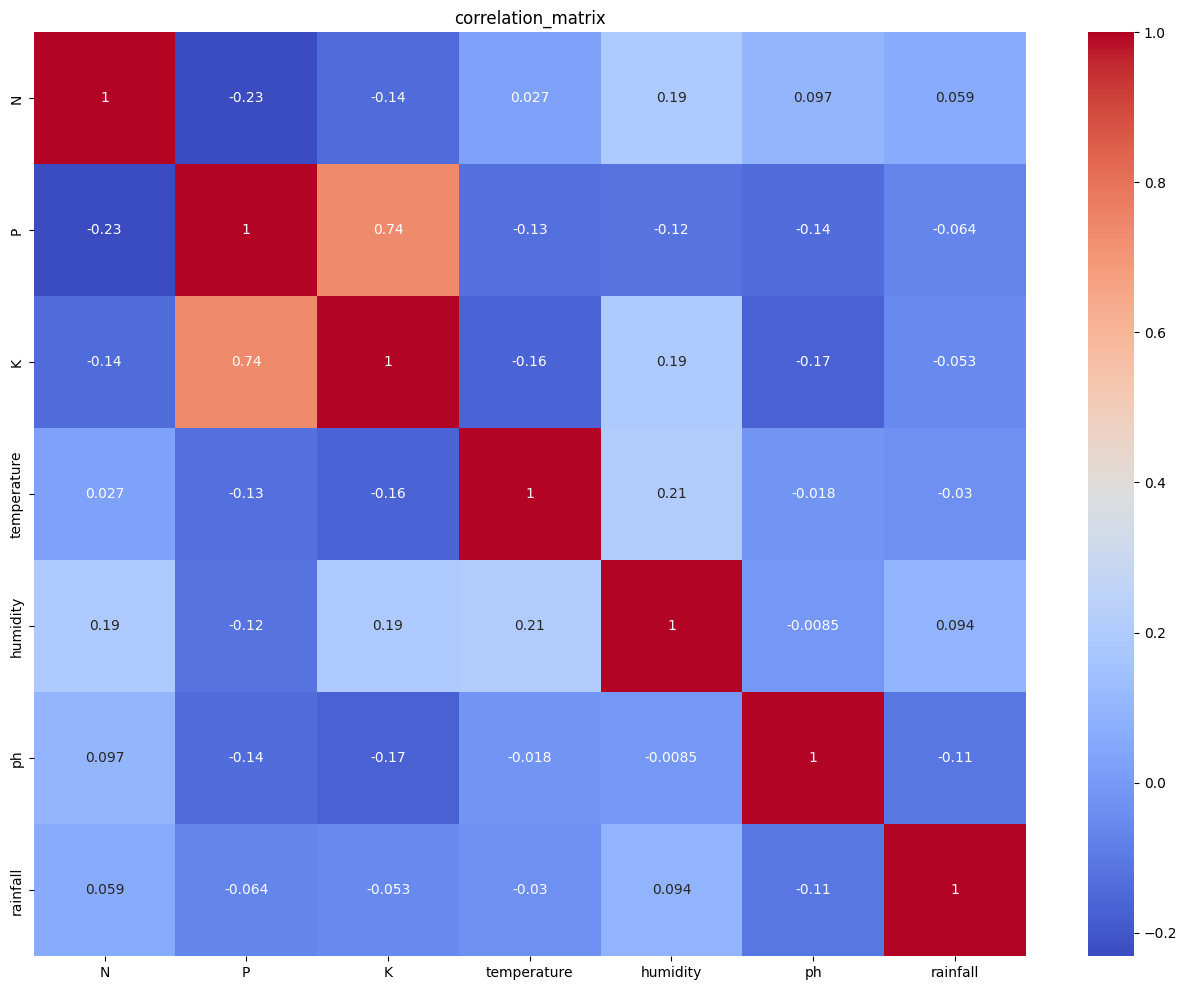

In [42]:
# print(f_labels)
# correlation_matrix = data_set[f_title].corr()
correlation_matrix = data_set.select_dtypes(include=[np.number]).corr()

# print(correlation_matrix)
plt.figure(figsize=(16,12))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("correlation_matrix")
plt.show()

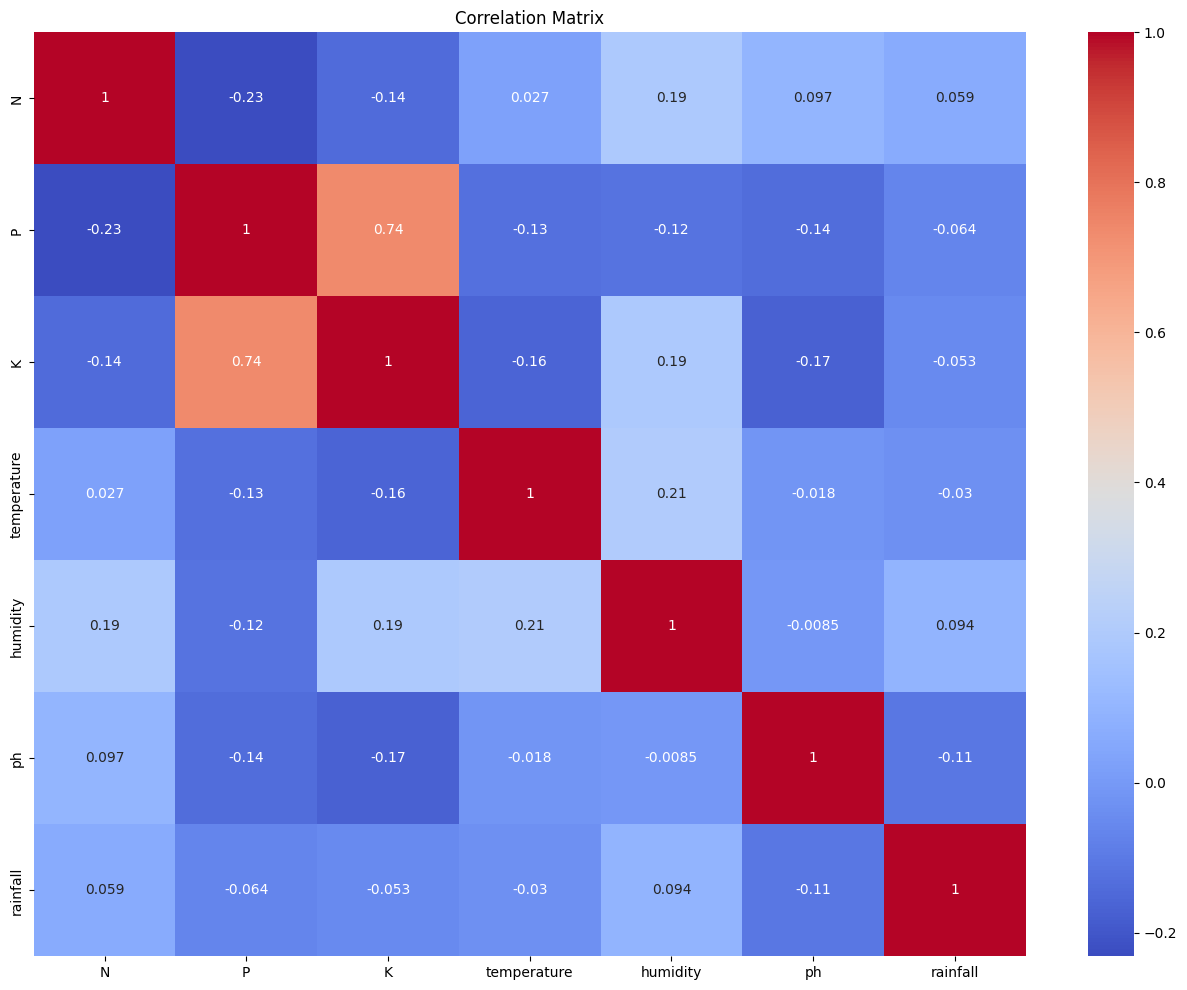

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data_set' is your DataFrame and 'f_title' is the list of columns

# Select only numeric columns
numeric_data_set = data_set.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
correlation_matrix = numeric_data_set.corr()

# Plotting the heatmap of the correlation matrix
plt.figure(figsize=(16,12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


## Split Dependent and Independent Data

In [44]:
x = data_set.iloc[:,:-1]
y = data_set.iloc[:, -1]
print(x.shape, y.shape)

(2200, 7) (2200,)


# Feature Selection

## 1. Recursive Feature Elimination (RFE):

In [45]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVC

estimator = SVC(kernel="linear")
selector = RFE(estimator, n_features_to_select=15, step=1)  # Choose a target number of features
selector = selector.fit(x, y)

# Get the selected features
selected_features = selector.support_
x_selected = x.iloc[:, selected_features]
print(x_selected.shape)

(2200, 7)


c:\Users\Sifat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_selection\_rfe.py:291: UserWarning: Found n_features_to_select=15 > n_features=7. There will be no feature selection and all features will be kept.
  warnings.warn(


## Visualize Selected Features 

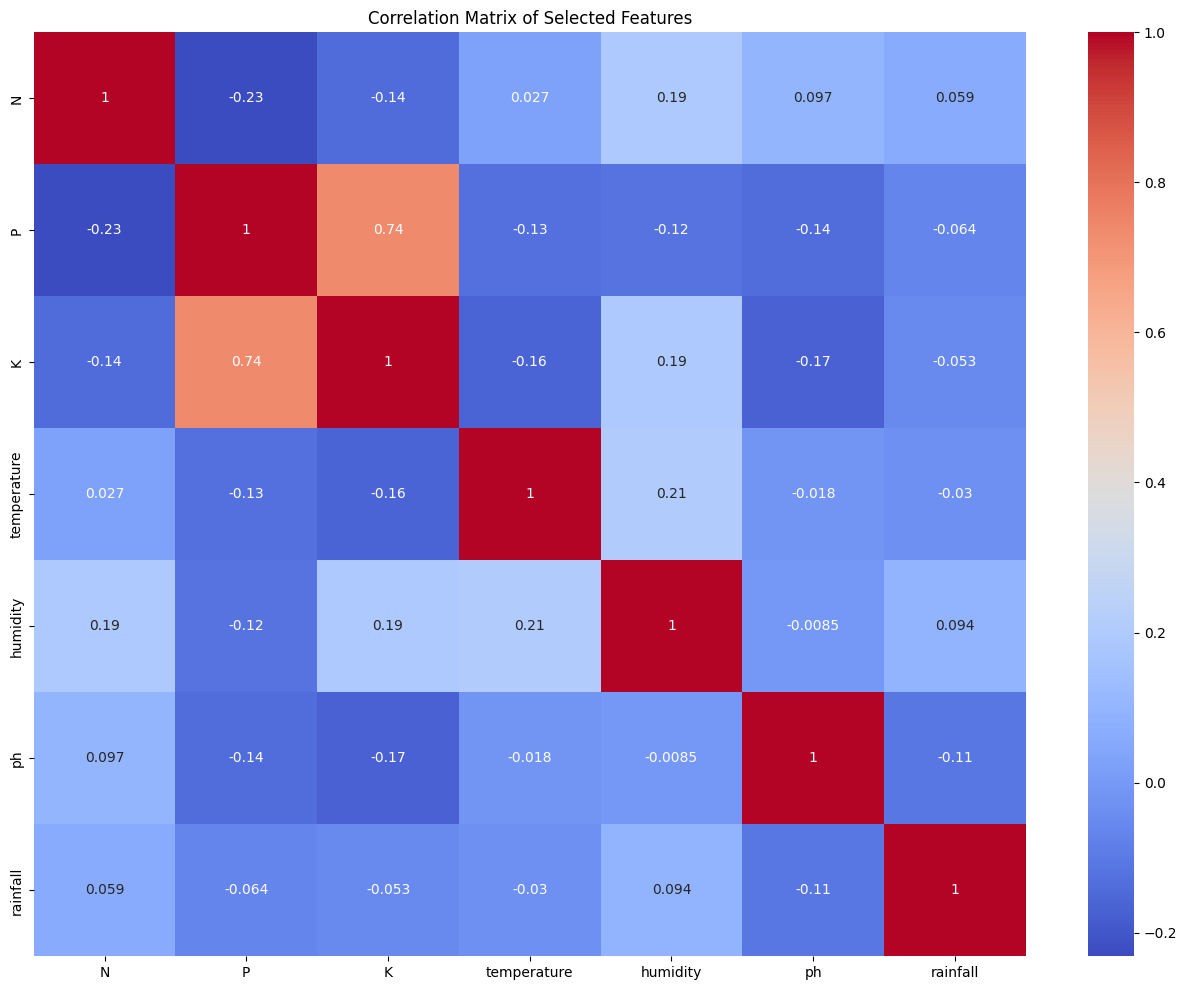

In [46]:
# print(f_labels)
correlation_matrix = x_selected.corr()
# print(correlation_matrix)
plt.figure(figsize=(16,12))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of Selected Features")
plt.show()

## Split Train Test dataset

In [47]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)
# print(x_train)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
# print(x_train)
x_test = scaler.fit_transform(x_test)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)


(1540, 7) (660, 7) (1540,) (660,)


In [48]:
x_train_fs,x_test_fs,y_train_fs,y_test_fs = train_test_split(x_selected,y,test_size=0.3,random_state=42)
# print(x_train)
scaler = StandardScaler()
x_train_fs = scaler.fit_transform(x_train_fs)
# print(x_train)
x_test_fs = scaler.fit_transform(x_test_fs)
print(x_train_fs.shape,x_test_fs.shape,y_train_fs.shape,y_test_fs.shape)

(1540, 7) (660, 7) (1540,) (660,)


## Logistic Regression

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def logistic_regression(_x_train, _x_test, _y_train, _y_test):
    # Setting multi_class='multinomial' to use the softmax approach
    clf = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42)
    
    # Train the model
    clf.fit(_x_train, _y_train)
    
    # Make predictions on the test data
    _y_pred = clf.predict(_x_test)

    return accuracy_score(_y_test, _y_pred), confusion_matrix(_y_test, _y_pred),  classification_report(_y_test, _y_pred)

# Evaluate the model
accuracy_lr, conf_matrix_lr, class_report_lr = logistic_regression(x_train, x_test, y_train, y_test)
accuracy_lr_fs, conf_matrix_lr_fs, class_report_lr_fs = logistic_regression(x_train_fs, x_test_fs, y_train_fs, y_test_fs)

print(f"Accuracy: {accuracy_lr:.2f}")
print(f"Accuracy Fs: {accuracy_lr_fs:.2f}")
print("Confusion Matrix:\n", conf_matrix_lr)
print("Confusion Matrix fs:\n", conf_matrix_lr_fs)
print("Classification Report:\n", class_report_lr)
print("Classification Report fs:\n", class_report_lr_fs)

Accuracy: 0.95
Accuracy Fs: 0.95
Confusion Matrix:
 [[34  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 22  0  0  0  0  0  0  0  4  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 34  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 33  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 28  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0 31  0  0  0  0  0  0  0  0  1  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0 35  0  0  0  0  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 21  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0 25  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 32  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  0  0 32  0  0  

c:\Users\Sifat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\Sifat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


## SVM

In [50]:
from sklearn.svm import SVC

def svm(_x_train, _x_test, _y_train, _y_test):
    classifier = SVC(kernel = 'linear', random_state = 0)
    classifier.fit(_x_train, _y_train)
    # Predicting the Test set results
    _y_pred = classifier.predict(_x_test)
    
    # Evaluate the model
    return accuracy_score(_y_test, _y_pred), confusion_matrix(_y_test, _y_pred), classification_report(_y_test, _y_pred)
    
accuracy_svm, conf_matrix_svm, class_report_svm = svm(x_train, x_test, y_train, y_test)
accuracy_svm_fs, conf_matrix_svm_fs, class_report_svm_fs = svm(x_train_fs, x_test_fs, y_train_fs, y_test_fs)
print(f"Accuracy: {accuracy_svm:.2f}")
print(f"Accuracy fs: {accuracy_svm_fs:.2f}")
print("Confusion Matrix:\n", conf_matrix_svm)
print("Confusion Matrix fs:\n", conf_matrix_svm_fs)
print("Classification Report:\n", class_report_svm)
print("Classification Report fs:\n", class_report_svm_fs)

Accuracy: 0.96
Accuracy fs: 0.96
Confusion Matrix:
 [[34  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 23  0  0  0  0  0  0  0  3  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 34  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 33  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 29  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 28  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 33  0  0  0  0  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0 36  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 22  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  3  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 32  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  3  0  0 31  0  0  

## Random Forest

In [51]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def random_forest(_x_train, _x_test, _y_train, _y_test):
    # Initialize the RandomForestRegressor
    regressor = RandomForestRegressor(n_estimators=10, random_state=0)
    
    # Fit the model
    regressor.fit(_x_train, _y_train)
    
    # Predict the target values
    _y_pred = regressor.predict(_x_test)
    
    # Optionally round predictions if required (useful for regression tasks with integer targets)
    _y_pred = np.round(_y_pred, decimals=0)
    
    # Evaluate the model using regression metrics
    mae = mean_absolute_error(_y_test, _y_pred)
    mse = mean_squared_error(_y_test, _y_pred)
    r2 = r2_score(_y_test, _y_pred)
    
    return mae, mse, r2

# Call the function for both datasets (assuming `x_train`, `x_test`, `y_train`, `y_test` are defined)
mae_rf, mse_rf, r2_rf = random_forest(x_train, x_test, y_train, y_test)
mae_rf_fs, mse_rf_fs, r2_rf_fs = random_forest(x_train_fs, x_test_fs, y_train_fs, y_test_fs)

# Print the results
print(f"Mean Absolute Error: {mae_rf:.2f}")
print(f"Mean Squared Error: {mse_rf:.2f}")
print(f"R-squared: {r2_rf:.2f}")

print(f"Mean Absolute Error (fs): {mae_rf_fs:.2f}")
print(f"Mean Squared Error (fs): {mse_rf_fs:.2f}")
print(f"R-squared (fs): {r2_rf_fs:.2f}")


ValueError: could not convert string to float: 'mango'

In [18]:
from sklearn.ensemble import RandomForestRegressor
def random_forest(_x_train, _x_test, _y_train, _y_test):
    regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
    regressor.fit(_x_train, _y_train)
    _y_pred = regressor.predict(_x_test)
    _y_pred = np.round(_y_pred, decimals=0)
    
    # Evaluate the model
    return accuracy_score(_y_test, _y_pred), confusion_matrix(_y_test, _y_pred), classification_report(_y_test, _y_pred)

accuracy_rf, conf_matrix_rf, class_report_rf = random_forest(x_train, x_test, y_train, y_test)
accuracy_rf_fs, conf_matrix_rf_fs, class_report_rf_fs = random_forest(x_train_fs, x_test_fs, y_train_fs, y_test_fs)

print(f"Accuracy: {accuracy_rf:.2f}")
print(f"Accuracy fs: {accuracy_rf_fs:.2f}")
print("Confusion Matrix:\n", conf_matrix_rf)
print("Confusion Matrix fs:\n", conf_matrix_rf_fs)
print("Classification Report:\n", class_report_rf)
print("Classification Report_fs:\n", class_report_rf_fs)

ValueError: could not convert string to float: 'mango'

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np

def random_forest(_x_train, _x_test, _y_train, _y_test):
    # Initialize the RandomForestClassifier
    classifier = RandomForestClassifier(n_estimators=10, random_state=0)
    
    # Fit the model on the training data
    classifier.fit(_x_train, _y_train)
    
    # Predict on the test data
    _y_pred = classifier.predict(_x_test)
    
    # Evaluate the model
    return accuracy_score(_y_test, _y_pred), confusion_matrix(_y_test, _y_pred), classification_report(_y_test, _y_pred)

# Now call the function with your training and testing data
accuracy_rf, conf_matrix_rf, class_report_rf = random_forest(x_train, x_test, y_train, y_test)

# For feature-selected data (if you are using feature selection)
accuracy_rf_fs, conf_matrix_rf_fs, class_report_rf_fs = random_forest(x_train_fs, x_test_fs, y_train_fs, y_test_fs)

print(f"Accuracy: {accuracy_rf:.2f}")
print(f"Confusion Matrix:\n{conf_matrix_rf}")
print(f"Classification Report:\n{class_report_rf}")


Accuracy: 0.96
Confusion Matrix:
[[34  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 23  0  0  0  0  0  0  0  3  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 34  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 33  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 29  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 27  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 34  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 32  0  0  0  0  0  0  0  0  4  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 22  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  2  0  0  0  0 24  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 32  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  1  0  0 31  0  1  0  0  0  0  0  0]
 

## Naive Bayes

In [23]:
from sklearn.naive_bayes import GaussianNB

def naive_bayes(_x_train, _x_test, _y_train, _y_test):
    naive_bayes_model = GaussianNB()
    naive_bayes_model.fit(_x_train, _y_train)
    
    _y_pred = naive_bayes_model.predict(_x_test)
    _y_pred = np.round(_y_pred, decimals=0)
    
    
    # Evaluate the model
    return accuracy_score(_y_test, _y_pred), confusion_matrix(_y_test, _y_pred), classification_report(_y_test, _y_pred)

accuracy_gnb, conf_matrix_gnb, class_report_gnb = naive_bayes(x_train, x_test, y_train, y_test)
accuracy_gnb_fs, conf_matrix_gnb_fs, class_report_gnb_fs = naive_bayes(x_train_fs, x_test_fs, y_train_fs, y_test_fs)

print(f"Accuracy: {accuracy_gnb:.2f}")
print(f"Accuracy fs: {accuracy_gnb_fs:.2f}")
print("Confusion Matrix:\n", conf_matrix_gnb)
print("Confusion Matrix fs:\n", conf_matrix_gnb_fs)
print("Classification Report fs:\n", class_report_gnb_fs)

TypeError: ufunc 'rint' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [38]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def naive_bayes(_x_train, _x_test, _y_train, _y_test):
    # Initialize the Naive Bayes classifier
    classifier = GaussianNB()
    
    # Fit the model on the training data
    classifier.fit(_x_train, _y_train)
    
    # Predict on the test data
    _y_pred = classifier.predict(_x_test)
    
    # Evaluate the model (no rounding needed)
    return accuracy_score(_y_test, _y_pred), confusion_matrix(_y_test, _y_pred), classification_report(_y_test, _y_pred)

# Call the function with your training and testing data
accuracy_gnb, conf_matrix_gnb, class_report_gnb = naive_bayes(x_train, x_test, y_train, y_test)

# If you have feature-selected data:
accuracy_gnb_fs, conf_matrix_gnb_fs, class_report_gnb_fs = naive_bayes(x_train_fs, x_test_fs, y_train_fs, y_test_fs)

print(f"Accuracy: {accuracy_gnb:.2f}")
print(f"Confusion Matrix:\n{conf_matrix_gnb}")
print(f"Classification Report:\n{class_report_gnb}")


Accuracy: 0.98
Confusion Matrix:
[[34  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 22  0  0  0  0  0  0  0  4  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 34  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 33  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 28  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 34  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 34  0  0  0  0  0  0  0  0  2  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 21  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  2  0  0  0  0 24  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 32  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 34  0  0  0  0  0  0  0  0]
 

# Deep Learning Algorithm 

## extract the predict value

In [16]:
def extract_predict(y_pred):
    y_pred = np.round(y_pred, decimals=0)
    y_p = []
    for y in y_pred:
        if y[0]==1:
            y_p.append(1)
        elif y[1] == 1:
            y_p.append(2)
        else:
            y_p.append(3)
    return y_p

## Feedforward Neural Network (FNN)

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.backend import clear_session

def fnn(_x_train, _x_test, _y_train, _y_test):
    clear_session()
    # Define the model
    model = Sequential()
    model.add(Dense(64, input_dim=_x_train.shape[1], activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(3, activation='softmax'))  # For multi-class classification
    
    # Compile the model
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    # Train the model
    history = model.fit(_x_train, (_y_train-1), epochs=20, batch_size=16, validation_split=0.3, verbose=1)
    
    # Evaluate the model
    test_loss, test_acc = model.evaluate(_x_test, _y_test-1)
    print(f'Test accuracy: {test_acc}')
    
    # Make predictions
    _y_pred = model.predict(_x_test)
    _y_pred = extract_predict(_y_pred)

    
    # Evaluate the model
    return accuracy_score(_y_test, _y_pred), confusion_matrix(_y_test, _y_pred), classification_report(_y_test, _y_pred)

# Evaluate the model
accuracy_fnn, conf_matrix_fnn, class_report_fnn = fnn(x_train, x_test, y_train, y_test)
accuracy_fnn_fs, conf_matrix_fnn_fs, class_report_fnn_fs = fnn(x_train_fs, x_test_fs, y_train_fs, y_test_fs)

print(f"Accuracy: {accuracy_fnn:.2f}")
print(f"Accuracy fs: {accuracy_fnn_fs:.2f}")
print("Confusion Matrix:\n", conf_matrix_fnn)
print("Confusion Matrix fs:\n", conf_matrix_fnn_fs)
print("Classification Report:\n", class_report_fnn)
print("Classification Report fs:\n", class_report_fnn_fs)

ModuleNotFoundError: No module named 'tensorflow'

## 1D Convolutional Neural Network (1D CNN)

In [15]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten

def cnn(_x_train, _x_test, _y_train, _y_test):
    clear_session()
    # Define the 1D CNN model
    cnn_model = Sequential()
    cnn_model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(_x_train.shape[1], 1)))
    cnn_model.add(MaxPooling1D(pool_size=2))
    cnn_model.add(Flatten())
    cnn_model.add(Dense(64, activation='relu'))
    cnn_model.add(Dropout(0.5))
    cnn_model.add(Dense(3, activation='softmax'))
    
    # Compile the model
    cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    # Train the model
    cnn_model.fit(_x_train, _y_train-1, epochs=20, batch_size=32, validation_split=0.3, verbose=1)
    
    # Evaluate the model
    cnn_test_loss, cnn_test_acc = cnn_model.evaluate(_x_test, _y_test-1)
    print(f'CNN Test accuracy: {cnn_test_acc}')
    # Make predictions
    _y_pred = cnn_model.predict(_x_test)
    _y_pred = extract_predict(_y_pred)
    
    # Evaluate the model
    return accuracy_score(_y_test, _y_pred), confusion_matrix(_y_test, _y_pred), classification_report(_y_test, _y_pred)

# Evaluate the model
accuracy_cnn, conf_matrix_cnn, class_report_cnn = cnn(x_train, x_test, y_train, y_test)
accuracy_cnn_fs, conf_matrix_cnn_fs, class_report_cnn_fs = cnn(x_train_fs, x_test_fs, y_train_fs, y_test_fs)

print(f"Accuracy: {accuracy_cnn:.2f}")
print(f"Accuracy fs: {accuracy_cnn_fs:.2f}")
print("Confusion Matrix:\n", conf_matrix_cnn)
print("Confusion Matrix fs:\n", conf_matrix_cnn_fs)
print("Classification Report:\n", class_report_cnn)
print("Classification Report fs:\n", class_report_cnn_fs)

C:\Users\bayaz\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.7071 - loss: 0.8717 - val_accuracy: 0.8098 - val_loss: 0.5087
Epoch 2/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8213 - loss: 0.5067 - val_accuracy: 0.8792 - val_loss: 0.3578
Epoch 3/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8497 - loss: 0.4157 - val_accuracy: 0.8926 - val_loss: 0.3174
Epoch 4/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8575 - loss: 0.3854 - val_accuracy: 0.8926 - val_loss: 0.2982
Epoch 5/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8597 - loss: 0.3686 - val_accuracy: 0.8926 - val_loss: 0.2944
Epoch 6/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8644 - loss: 0.3387 - val_accuracy: 0.8949 - val_loss: 0.2796
Epoch 7/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8705 - loss: 0.3215 - val_accuracy: 0.8971 - val_loss: 0.2850
Epoch 8/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8675 - loss: 0.3192 - val_accuracy: 0.9016 - va

C:\Users\bayaz\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.7230 - loss: 0.8224 - val_accuracy: 0.8166 - val_loss: 0.5574
Epoch 2/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8311 - loss: 0.5433 - val_accuracy: 0.8770 - val_loss: 0.4257
Epoch 3/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8231 - loss: 0.4586 - val_accuracy: 0.8792 - val_loss: 0.3499
Epoch 4/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8574 - loss: 0.4297 - val_accuracy: 0.8859 - val_loss: 0.3243
Epoch 5/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8513 - loss: 0.3686 - val_accuracy: 0.9016 - val_loss: 0.3102
Epoch 6/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8774 - loss: 0.3171 - val_accuracy: 0.9016 - val_loss: 0.2964
Epoch 7/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8839 - loss: 0.3261 - val_accuracy: 0.9060 - val_loss: 0.2912
Epoch 8/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8853 - loss: 0.3131 - val_accuracy: 0.8971 - val_lo

## Confusion Matrixs

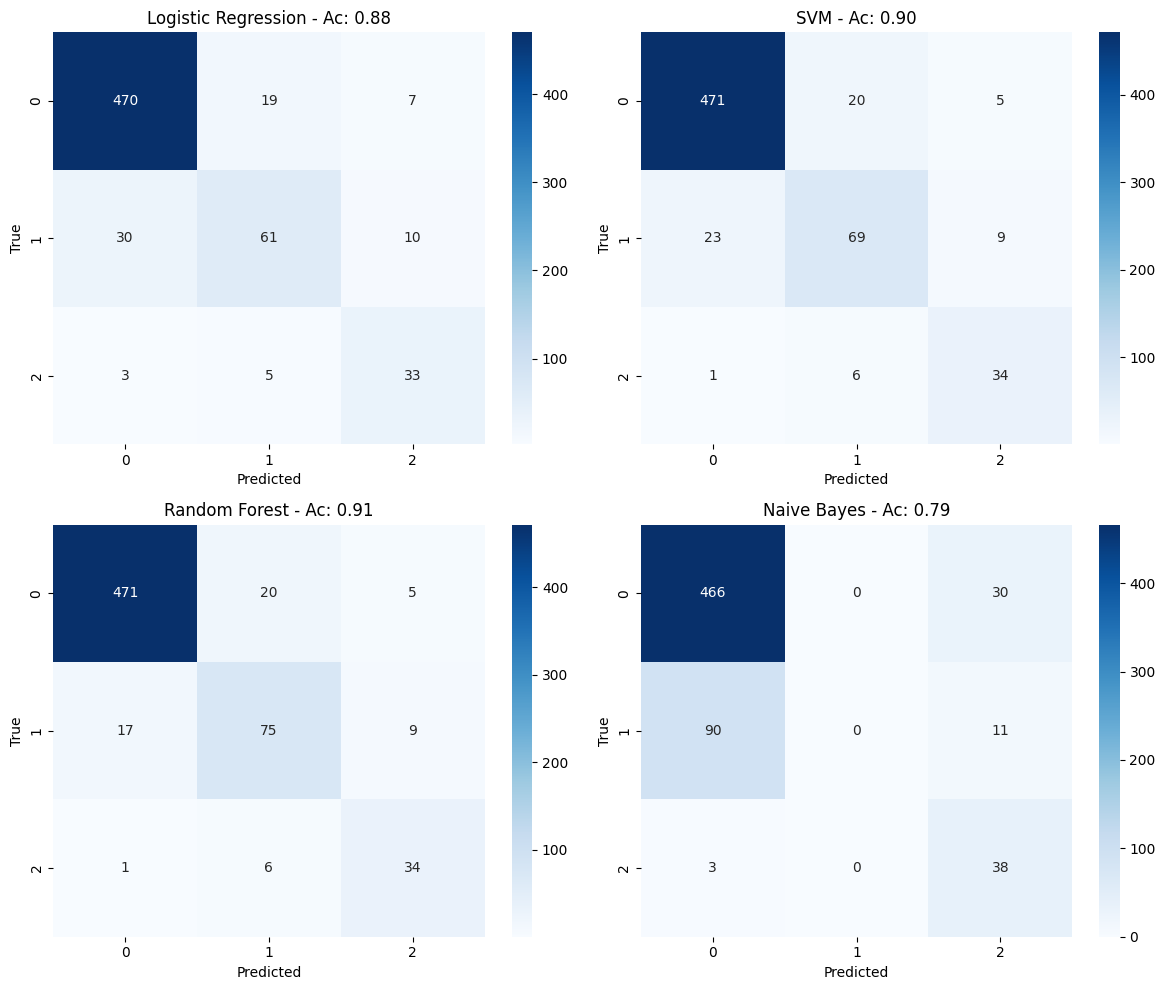

In [16]:
matrices = [conf_matrix_lr, conf_matrix_svm, conf_matrix_rf, conf_matrix_gnb]  # Replace with your confusion matrices
accuracies = [accuracy_lr, accuracy_svm, accuracy_rf, accuracy_gnb]
titles = ['Logistic Regression', 'SVM', 'Random Forest', 'Naive Bayes']

# Create a figure with a 2x2 grid
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Flatten the axes array for easy iteration
axs = axs.flatten()


for ax, cm, title, accuracy in zip(axs, matrices, titles, accuracies):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(f'{title} - Ac: {accuracy:.2f}')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')

plt.tight_layout()
plt.show()

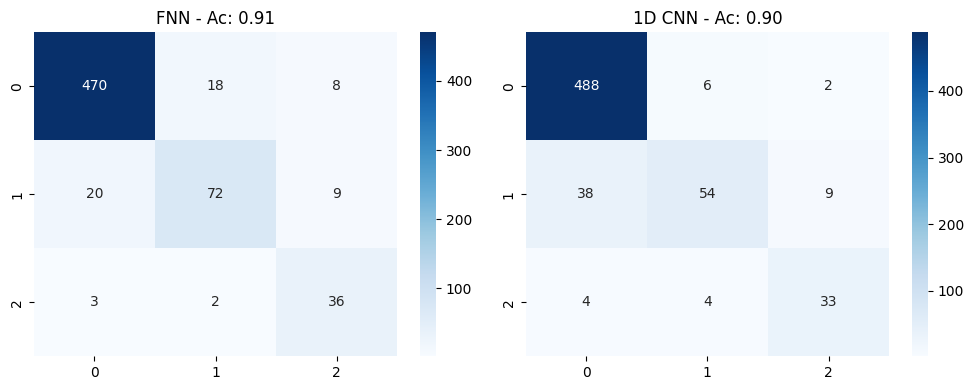

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

matrices = [conf_matrix_fnn, conf_matrix_cnn]  # Replace with your confusion matrices
accuracies = [accuracy_fnn, accuracy_cnn]
titles = ['FNN', '1D CNN']

for ax, cm, title,accuracy in zip(axs, matrices, titles, accuracies):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(f'{title} - Ac: {accuracy:.2f}')

plt.tight_layout()
plt.show()

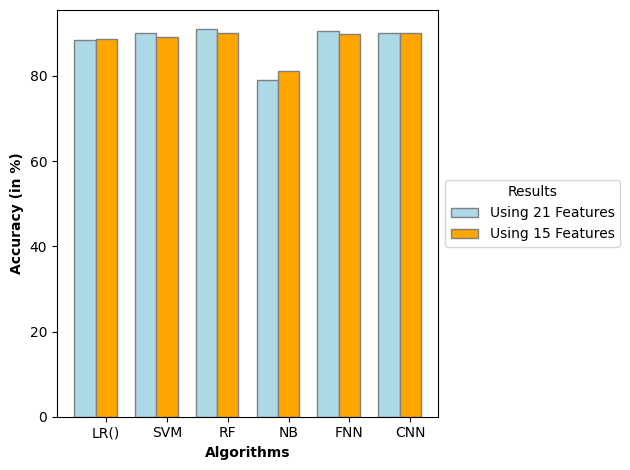

In [18]:
# Data for the chart
algorithms = ['LR()', 'SVM', 'RF', 'NB', 'FNN', 'CNN']
shade1 = [accuracy_lr*100, accuracy_svm*100, accuracy_rf*100, accuracy_gnb*100, accuracy_fnn*100, accuracy_cnn*100]
shade2 = [accuracy_lr_fs*100, accuracy_svm_fs*100, accuracy_rf_fs*100, accuracy_gnb_fs*100, accuracy_fnn_fs*100, accuracy_cnn_fs*100]

# Set the bar width
bar_width = 0.35

# Positions for each bar on the x-axis
r1 = np.arange(len(algorithms))
r2 = [x + bar_width for x in r1]

# Create the grouped bar chart
plt.bar(r1, shade1, color='lightblue', width=bar_width, edgecolor='grey', label='Using 21 Features')
plt.bar(r2, shade2, color='orange', width=bar_width, edgecolor='grey', label='Using 15 Features')

# Add labels
plt.xlabel('Algorithms', fontweight='bold')
plt.ylabel('Accuracy (in %)', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(algorithms))], algorithms)

# Move the legend to the right of the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Results")

# Adjust the layout to make room for the legend
plt.tight_layout()

# Display the chart
plt.show()